# Data Loading and Initial Exploration


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("C:/Users/Windows 11/Desktop/New folder (5)/housePricepredict.csv")

# Display basic information about the dataset
print(data.info())
print(data.describe())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Replace 'house_price' with 'SalePrice'
target_column = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB
None
                Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean   1459.000000    57.13

# Data Visualization


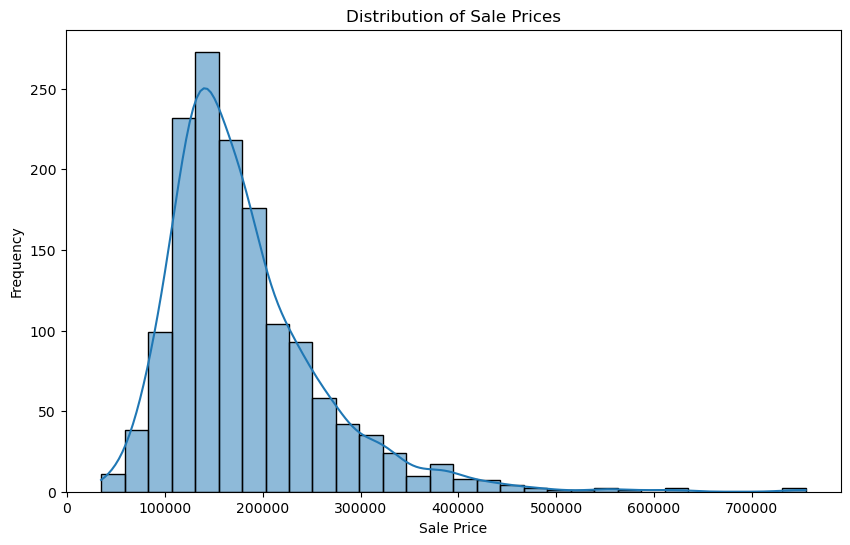

In [2]:
# Data visualization
# Histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[target_column], bins=30, kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

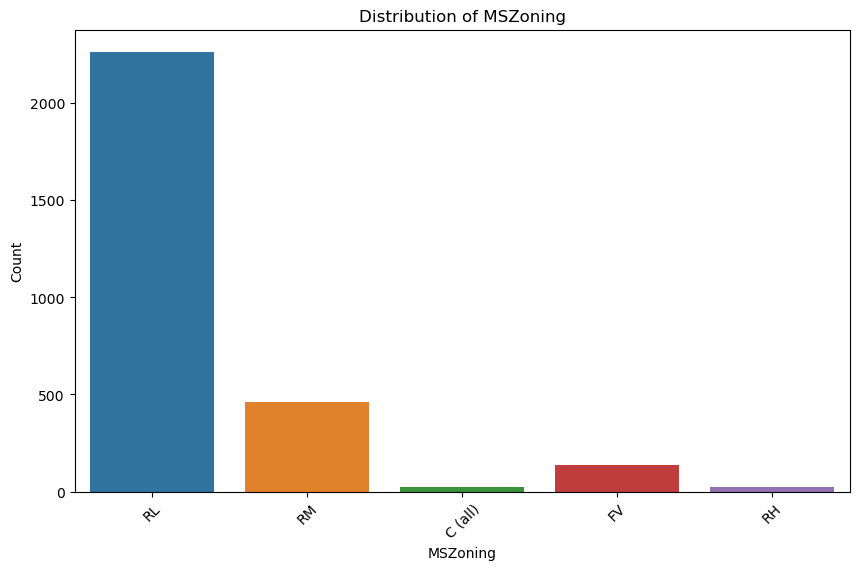

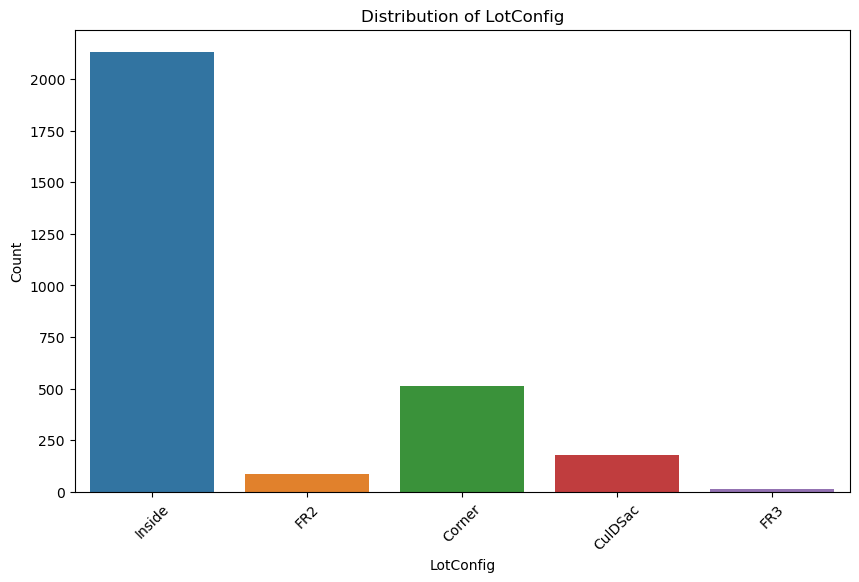

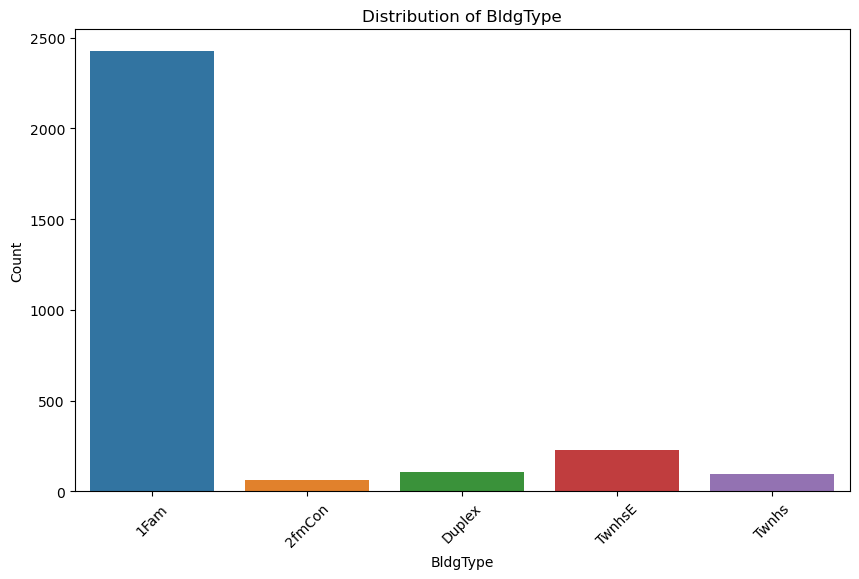

In [3]:
# Bar plots for some categorical features
categorical_features = ['MSZoning', 'LotConfig', 'BldgType']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Correlation Analysis


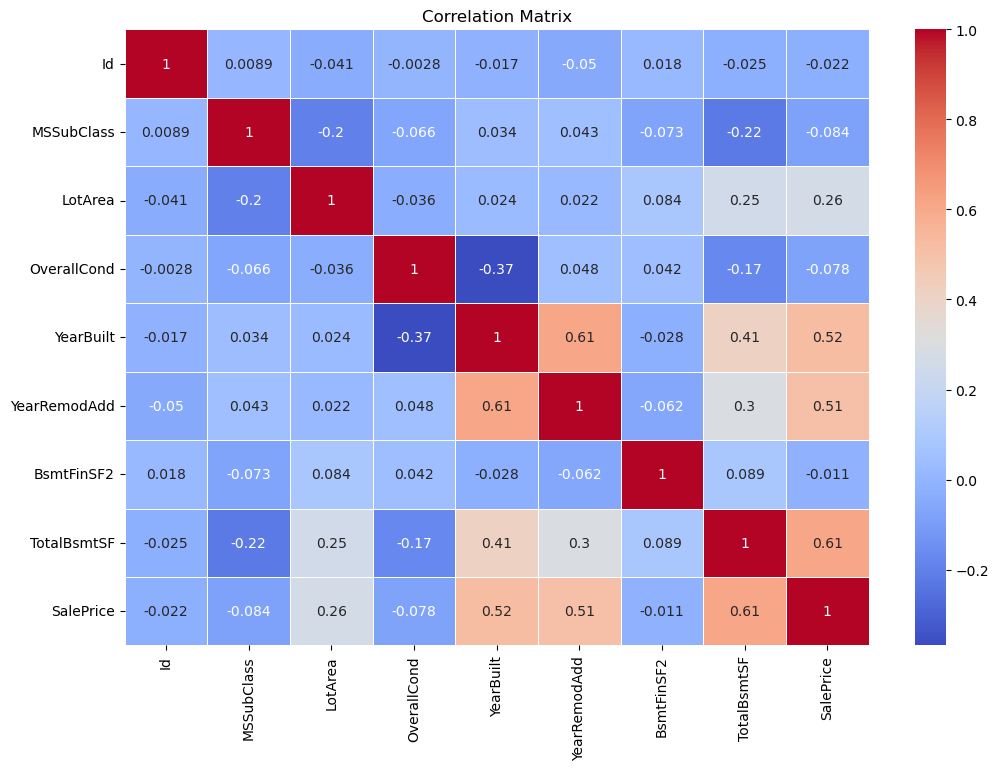

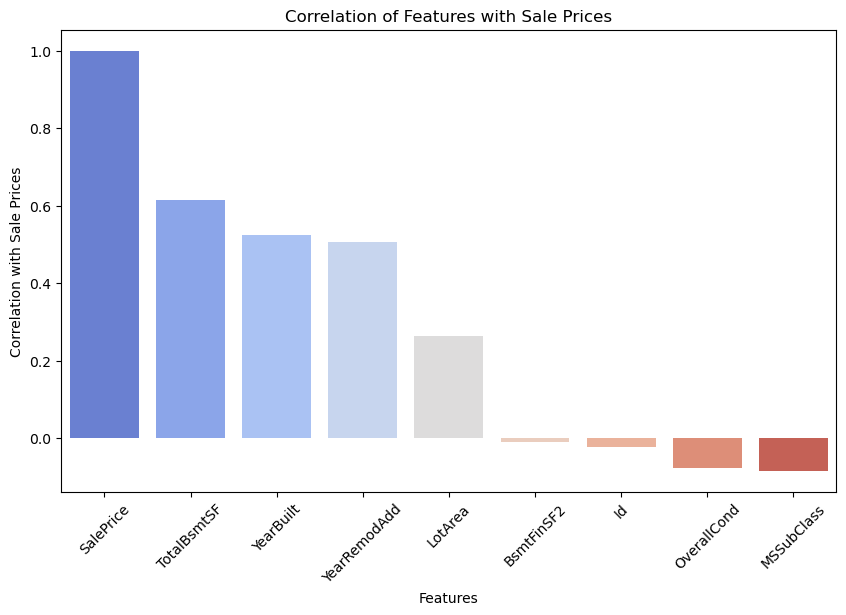

In [5]:
# Filter numeric columns for correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Highlight correlations with the target variable (SalePrice)
plt.figure(figsize=(10, 6))
correlation_with_target = correlation_matrix[target_column].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Sale Prices')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Correlation with Sale Prices')
plt.show()

# Data Imputation for Missing Values and Target Variable Handling


In [6]:
# Data Imputation for Missing Values and Target Variable Handling
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with mean
numerical_columns = ['BsmtFinSF2', 'TotalBsmtSF']
imputer_numerical = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer_numerical.fit_transform(data[numerical_columns])

# Impute missing values in categorical columns with mode
categorical_columns = ['MSZoning', 'Exterior1st']
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])

# Drop rows with missing values in the target variable
data.dropna(subset=['SalePrice'], inplace=True)

# Model Fitting, Visualization, and Evaluation

In [7]:
# Now we continue with model fitting, visualization, and evaluation steps
# Split the data into features (X) and target (y)
X = data.drop(target_column, axis=1)
y = data[target_column]

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X)
print(X)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a machine learning model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


        Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  \
0        0          60     8450            5       2003          2003   
1        1          20     9600            8       1976          1976   
2        2          60    11250            5       2001          2002   
3        3          70     9550            5       1915          1970   
4        4          60    14260            5       2000          2000   
...    ...         ...      ...          ...        ...           ...   
1455  1455          60     7917            5       1999          2000   
1456  1456          20    13175            6       1978          1988   
1457  1457          70     9042            9       1941          2006   
1458  1458          20     9717            6       1950          1996   
1459  1459          20     9937            6       1965          1965   

      BsmtFinSF2  TotalBsmtSF  MSZoning_C (all)  MSZoning_FV  ...  \
0            0.0        856.0             False       

# Evaluate Model Performance and Visualization


Mean Squared Error: 2917494855.290901
R-squared: 0.6196387511450039


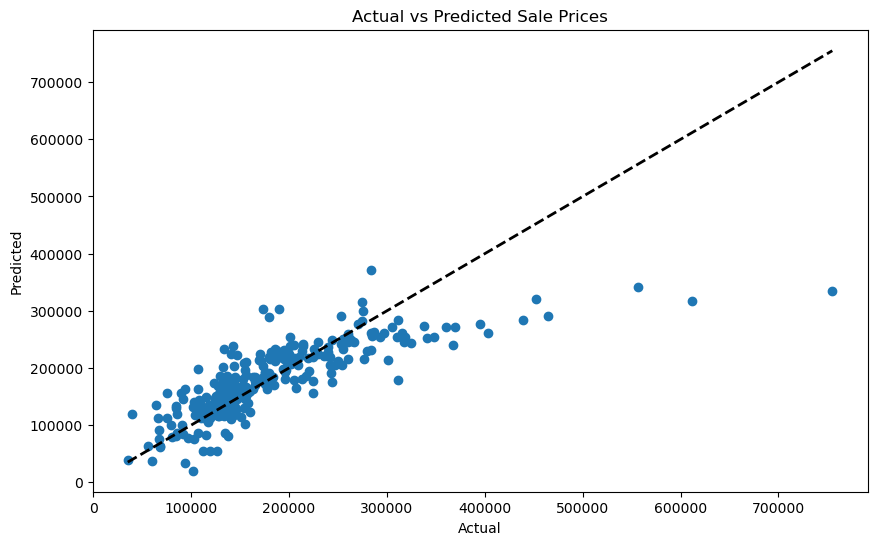

In [8]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualization of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Sale Prices')
plt.show()